# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={unit}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto real
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | inda silase
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | kavarna
Processing Record 13 of Set 1 | akureyri
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | hammerfest
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 

Processing Record 40 of Set 4 | konosha
Processing Record 41 of Set 4 | kimberley
Processing Record 42 of Set 4 | san luis de la loma
Processing Record 43 of Set 4 | george town
Processing Record 44 of Set 4 | manaquiri
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | nynashamn
Processing Record 48 of Set 4 | mount pearl
Processing Record 49 of Set 4 | hobbs
Processing Record 0 of Set 5 | polillo
Processing Record 1 of Set 5 | olyokminsk
Processing Record 2 of Set 5 | akrehamn
Processing Record 3 of Set 5 | penticton
Processing Record 4 of Set 5 | hithadhoo
Processing Record 5 of Set 5 | salinas
Processing Record 6 of Set 5 | manta
Processing Record 7 of Set 5 | abraham's bay
City not found. Skipping...
Processing Record 8 of Set 5 | san antonio de pale
Processing Record 9 of Set 5 | svetlyy
Processing Record 10 of Set 5 | ubatuba
Processing Record 11 of Set 5 | preobrazheniye
Processing Record 12 of Set 5 | car

Processing Record 30 of Set 8 | alta
Processing Record 31 of Set 8 | temara
Processing Record 32 of Set 8 | illizi
Processing Record 33 of Set 8 | tarauaca
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | guatire
Processing Record 36 of Set 8 | acarau
Processing Record 37 of Set 8 | yartsevo
Processing Record 38 of Set 8 | mazagao
Processing Record 39 of Set 8 | ust'-ilimsk
Processing Record 40 of Set 8 | atafu village
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | brookings
Processing Record 43 of Set 8 | horta
Processing Record 44 of Set 8 | dubbo
Processing Record 45 of Set 8 | estevan
Processing Record 46 of Set 8 | tuensang
Processing Record 47 of Set 8 | choibalsan
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | chongwe
Processing Record 0 of Set 9 | sisimiut
Processing Record 1 of Set 9 | susa
Processing Record 2 of Set 9 | bihar sharif
Processing Record 3 of Set 9 | hobyo
Processing Record 4 of

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto real,36.5282,-6.1901,14.23,88,100,6.17,ES,1701832123
1,albany,42.6001,-73.9662,0.37,88,100,1.30,US,1701831950
2,talnakh,69.4865,88.3972,-32.51,78,7,0.79,RU,1701832124
3,waitangi,-43.9535,-176.5597,14.34,80,100,3.58,NZ,1701832125
4,yellowknife,62.4560,-114.3525,-4.77,100,100,1.79,CA,1701832126
5,port-aux-francais,-49.3500,70.2167,6.57,96,100,11.78,TF,1701832126
6,blackmans bay,-43.0167,147.3167,21.40,36,6,1.36,AU,1701832127
7,port elizabeth,-33.9180,25.5701,17.40,76,86,3.13,ZA,1701832128
8,afaahiti,-17.7500,-149.2833,24.93,84,100,5.44,PF,1701832129
9,inda silase,14.1031,38.2829,15.89,54,59,0.88,ET,1701832129


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto real,36.5282,-6.1901,14.23,88,100,6.17,ES,1701832123
1,albany,42.6001,-73.9662,0.37,88,100,1.30,US,1701831950
2,talnakh,69.4865,88.3972,-32.51,78,7,0.79,RU,1701832124
3,waitangi,-43.9535,-176.5597,14.34,80,100,3.58,NZ,1701832125
4,yellowknife,62.4560,-114.3525,-4.77,100,100,1.79,CA,1701832126


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

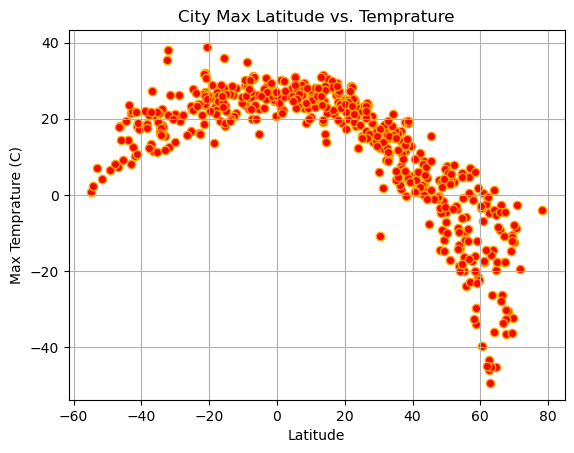

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.title("City Max Latitude vs. Temprature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

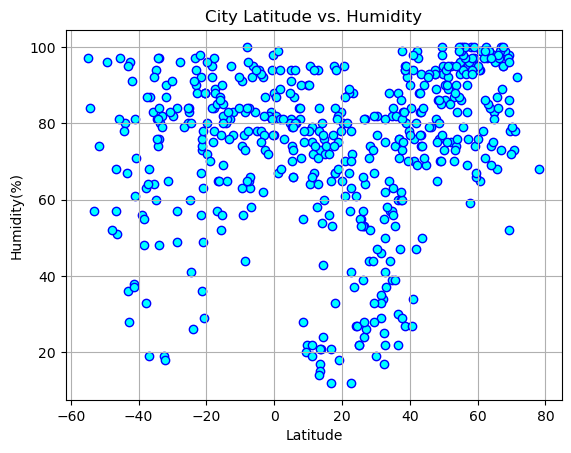

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

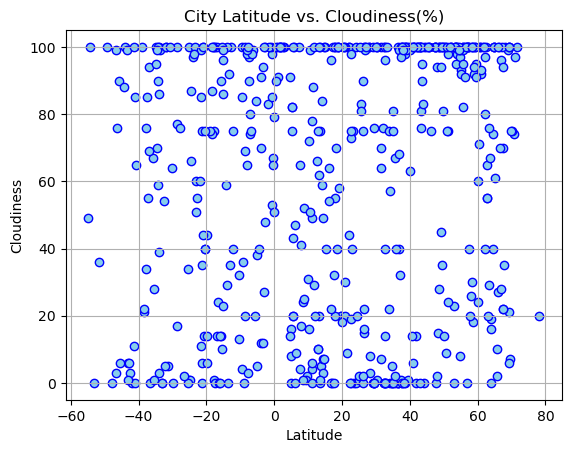

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness(%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

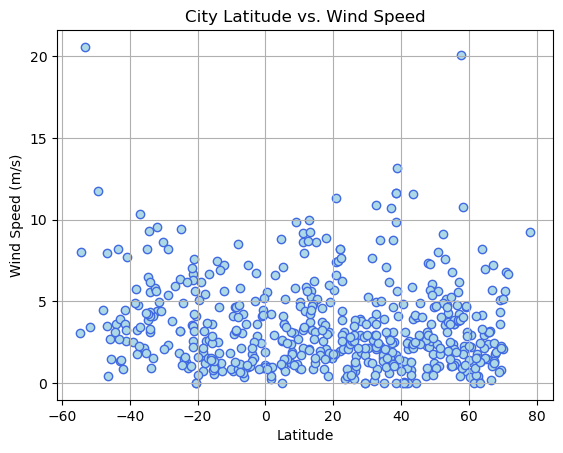

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = 'lightblue', edgecolor = 'royalblue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
feature_latVsTemp = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
feature_latVsHum = linregress(city_data_df["Lat"], city_data_df["Humidity"])
feature_latVsCloud = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
feature_latVsWind = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto real,36.5282,-6.1901,14.23,88,100,6.17,ES,1701832123
1,albany,42.6001,-73.9662,0.37,88,100,1.30,US,1701831950
2,talnakh,69.4865,88.3972,-32.51,78,7,0.79,RU,1701832124
4,yellowknife,62.4560,-114.3525,-4.77,100,100,1.79,CA,1701832126
9,inda silase,14.1031,38.2829,15.89,54,59,0.88,ET,1701832129


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,14.34,80,100,3.58,NZ,1701832125
5,port-aux-francais,-49.3500,70.2167,6.57,96,100,11.78,TF,1701832126
6,blackmans bay,-43.0167,147.3167,21.40,36,6,1.36,AU,1701832127
7,port elizabeth,-33.9180,25.5701,17.40,76,86,3.13,ZA,1701832128
8,afaahiti,-17.7500,-149.2833,24.93,84,100,5.44,PF,1701832129


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8745411409710957


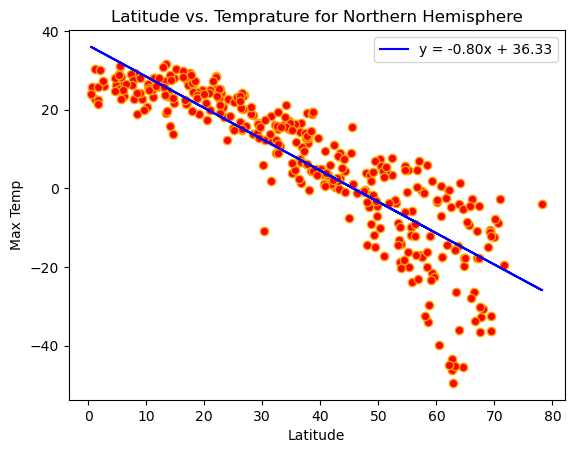

In [15]:
# Linear regression on Northern Hemisphere
feature_latVsTemp_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

slope = feature_latVsTemp_north[0]
intercept = feature_latVsTemp_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')
plt.plot(northern_hemi_df["Lat"], y, color = 'blue', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temprature for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsTemp_north[2]}")
plt.show()

The r-value is 0.6625288375365052


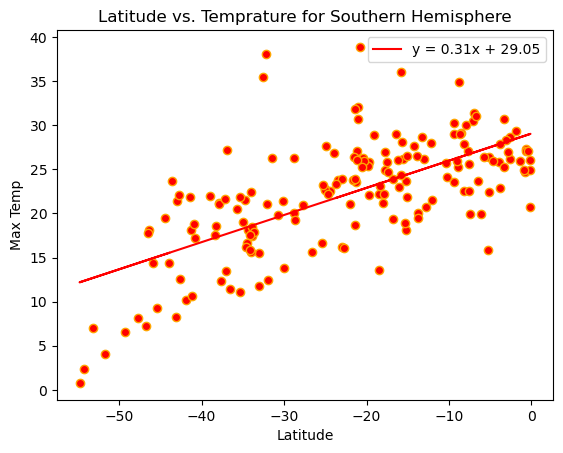

In [16]:
# Linear regression on Southern Hemisphere
feature_latVsTemp_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

slope = feature_latVsTemp_south[0]
intercept = feature_latVsTemp_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temprature for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsTemp_south[2]}")
plt.show()

**Discussion about the linear relationship:**

As we check the Latitude Vs. Maximum temprature for both Northern Hemisphere and Southern Hemisphere. Temprature tends to decrease as we go away from the equator (latitude = 0), either in North(where latitude is greater than zero) or South(where latitude is less than zero) in both graphs, based on the line regression. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.39096455898759513


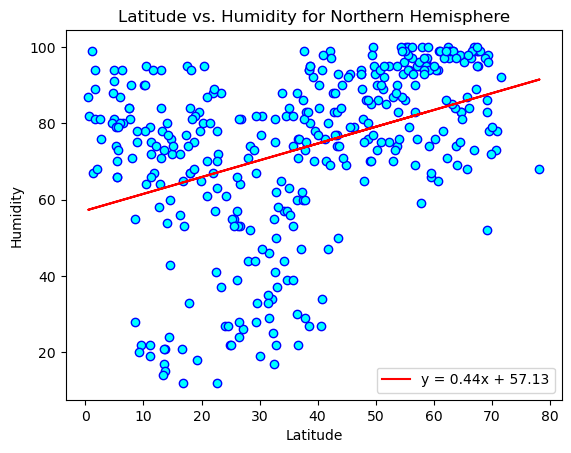

In [17]:
# Northern Hemisphere
feature_latVsHum_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

slope = feature_latVsHum_north[0]
intercept = feature_latVsHum_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsHum_north[2]}")
plt.show()

The r-value is 0.2307800565582027


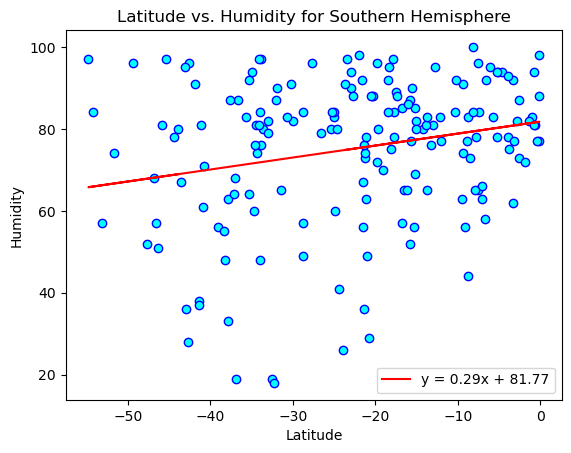

In [18]:
# Southern Hemisphere
feature_latVsHum_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

slope = feature_latVsHum_south[0]
intercept = feature_latVsHum_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsHum_south[2]}")
plt.show()

**Discussion about the linear relationship:** 

While, upon checking the Latitude Vs. Humidity for Northern Hemisphere. Humidity tends to increase as we go north(as Latitude increases) but when checking the same for Southern Hemisphere. Humidity is lower in southern most region(where latitude is least) and increases as we move toward the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2036179975858019


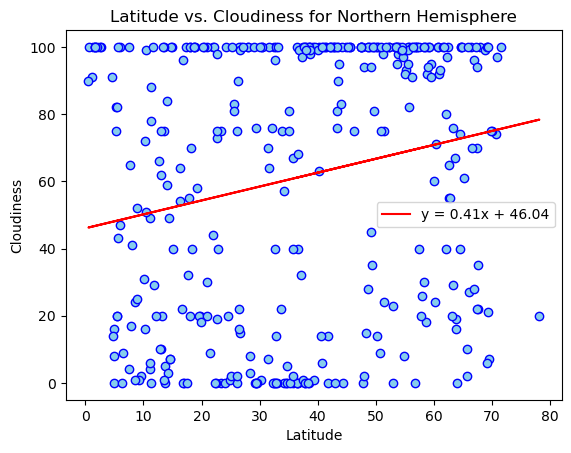

In [19]:
# Northern Hemisphere
feature_latVsCloud_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

slope = feature_latVsCloud_north[0]
intercept = feature_latVsCloud_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsCloud_north[2]}")
plt.show()

The r-value is 0.11989158739207115


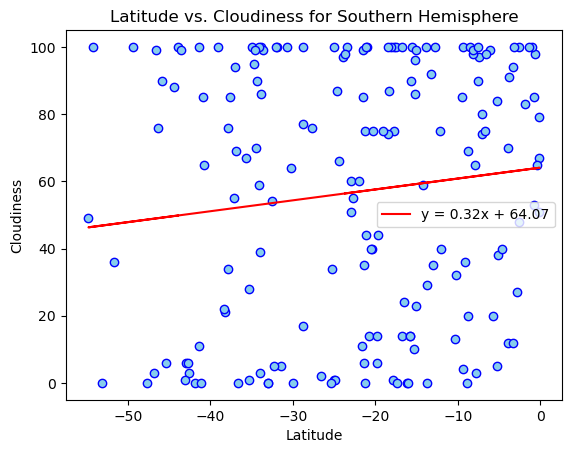

In [20]:
# Southern Hemisphere
feature_latVsCloud_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

slope = feature_latVsCloud_south[0]
intercept = feature_latVsCloud_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsCloud_south[2]}")
plt.show()

**Discussion about the linear relationship:** 

While, upon checking the Latitude Vs. Cloudiness for Northern Hemisphere. Cloudiness tends to increase as we go north(as Latitude increases) but when checking the same for Southern Hemisphere. Humidity is lower in southern most region(where latitude is least) and increases as we move toward the equator. This trend is similar to Latitude Vs. Humidity for both Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.03945764963299247


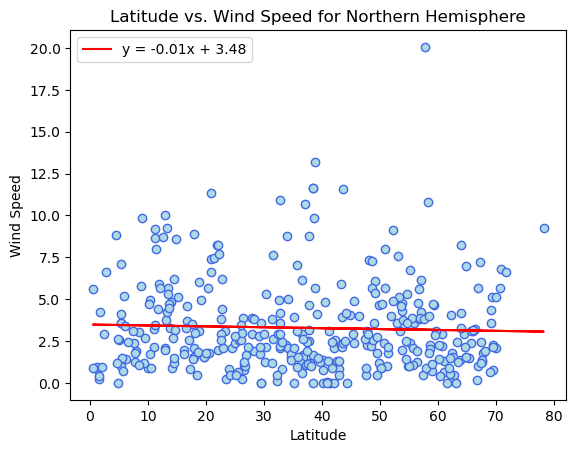

In [21]:
# Northern Hemisphere
feature_latVsWind_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

slope = feature_latVsWind_north[0]
intercept = feature_latVsWind_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], facecolor = 'lightblue', edgecolor = 'royalblue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsWind_north[2]}")
plt.show()

The r-value is -0.29980233359628056


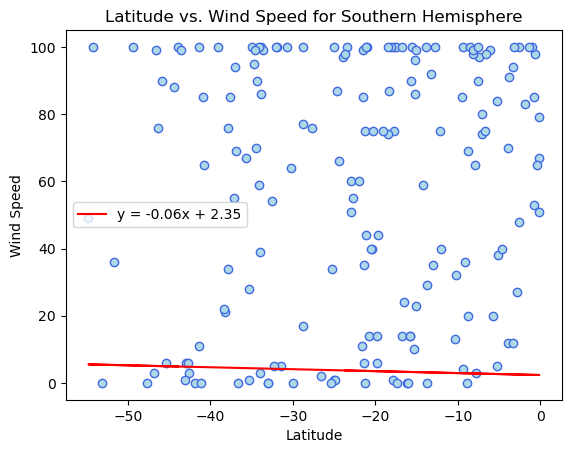

In [22]:
# Southern Hemisphere
feature_latVsWind_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

slope = feature_latVsWind_south[0]
intercept = feature_latVsWind_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolor = 'lightblue', edgecolor = 'royalblue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsWind_south[2]}")
plt.show()

**Discussion about the linear relationship:** 

Moreover, Upon checking the Latitude Vs. Wind Speed in Northern Hemisphere, it tends to remain same through the way from Equator (latitude = 0) to North Pole(latitude = 90) based on Linear equation but scatter plot suggest that Windspeed data is scattered all over the graph. While in case of Southern Hemisphere, Windspeed has just minor decrease as we go toward equator(latitude = 0).
